In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('avocado.csv')

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


First, LinearRegression will be done to predict Average Price.

In [5]:
df.shape

(1517, 14)

In [6]:
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1513,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1514,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1515,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#lets check no. of category for type of avocado.
df.type.unique()

array(['conventional'], dtype=object)

In [8]:
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

In [9]:
#lets check no. of region.
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
df.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

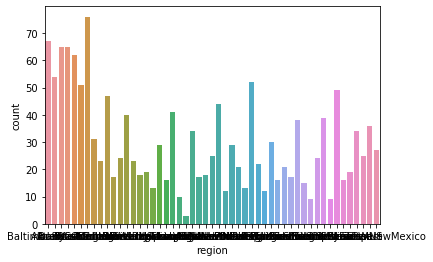

In [11]:
sns.countplot(x='region',data=df)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1 = ['type','region','Date']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [13]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,11,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,12,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,13,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


In [14]:
df.Date.unique()

array([ 92,  68,  44,  20,  98,  75,  51,  27,   3,  84,  60,  36,  12,
        90,  66,  42,  18,  99,  76,  52,  28,   4,  88,  64,  40,  16,
        94,  70,  46,  22, 102,  80,  56,  32,   8,  86,  62,  38,  14,
        96,  73,  49,  25,   1,  72,  48,  24,   0,  82,  58,  34,  10,
        85,  61,  37,  13,  91,  67,  43,  19, 100,  77,  53,  29,   5,
        83,  59,  26,   2,  79,  55,  31,   7,  89,  65,  41,  17,  93,
        69,  45,  21, 101,  39,  15,  97,  74,  50,  78,  54,  30,   6,
        35,  11,  95,  71,  47,  23, 103,  81,  57,  33,   9,  87,  63],
      dtype=int64)

In [15]:
df.Date.value_counts()

14     34
38     34
62     33
96     32
86     32
       ..
87      3
23      3
33      3
103     3
35      2
Name: Date, Length: 104, dtype: int64

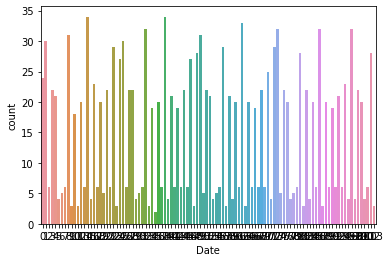

In [16]:
sns.countplot(x='Date',data=df)
plt.show()

In [17]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [18]:
#Toatl no.of region is 51.

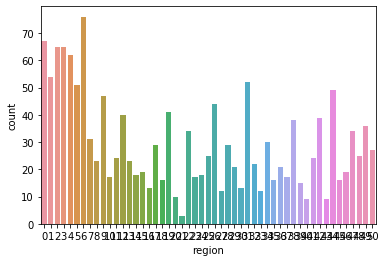

In [19]:
sns.countplot(x='region',data=df)
plt.show()

In [20]:
#Let's check the datatypes of the columns
df.dtypes

Unnamed: 0        int64
Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [21]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

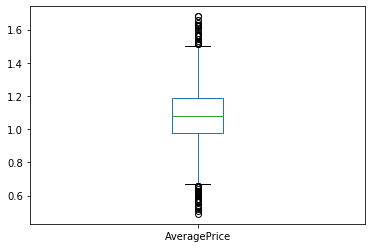

In [22]:
df['AveragePrice'].plot.box()

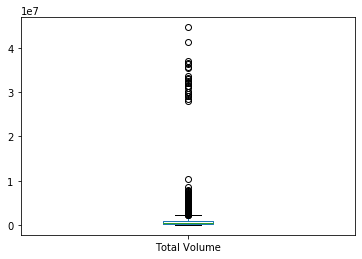

In [23]:
df['Total Volume'].plot.box()

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Date            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Small Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.465244,0.125;0.0945122x0.343182)
type               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
year               AxesSubplot(0.692073,0.125;0.0945122x0.343182)
region             AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

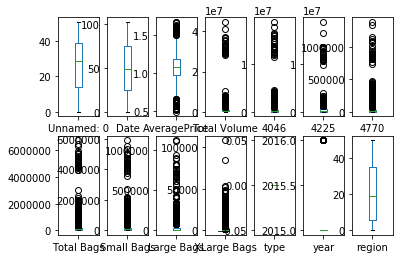

In [24]:
df.plot(kind ='box',subplots = True,layout=(2,7))

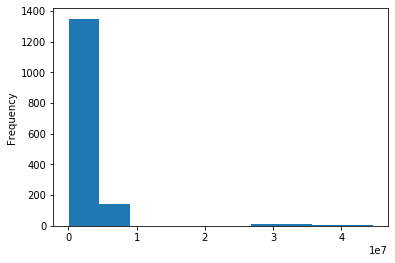

In [25]:
df['Total Volume'].plot.hist()

In [26]:
df['Total Volume'] = np.log(df['Total Volume'])

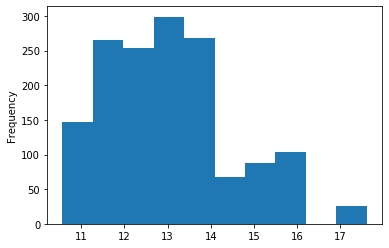

In [27]:
df['Total Volume'].plot.hist()

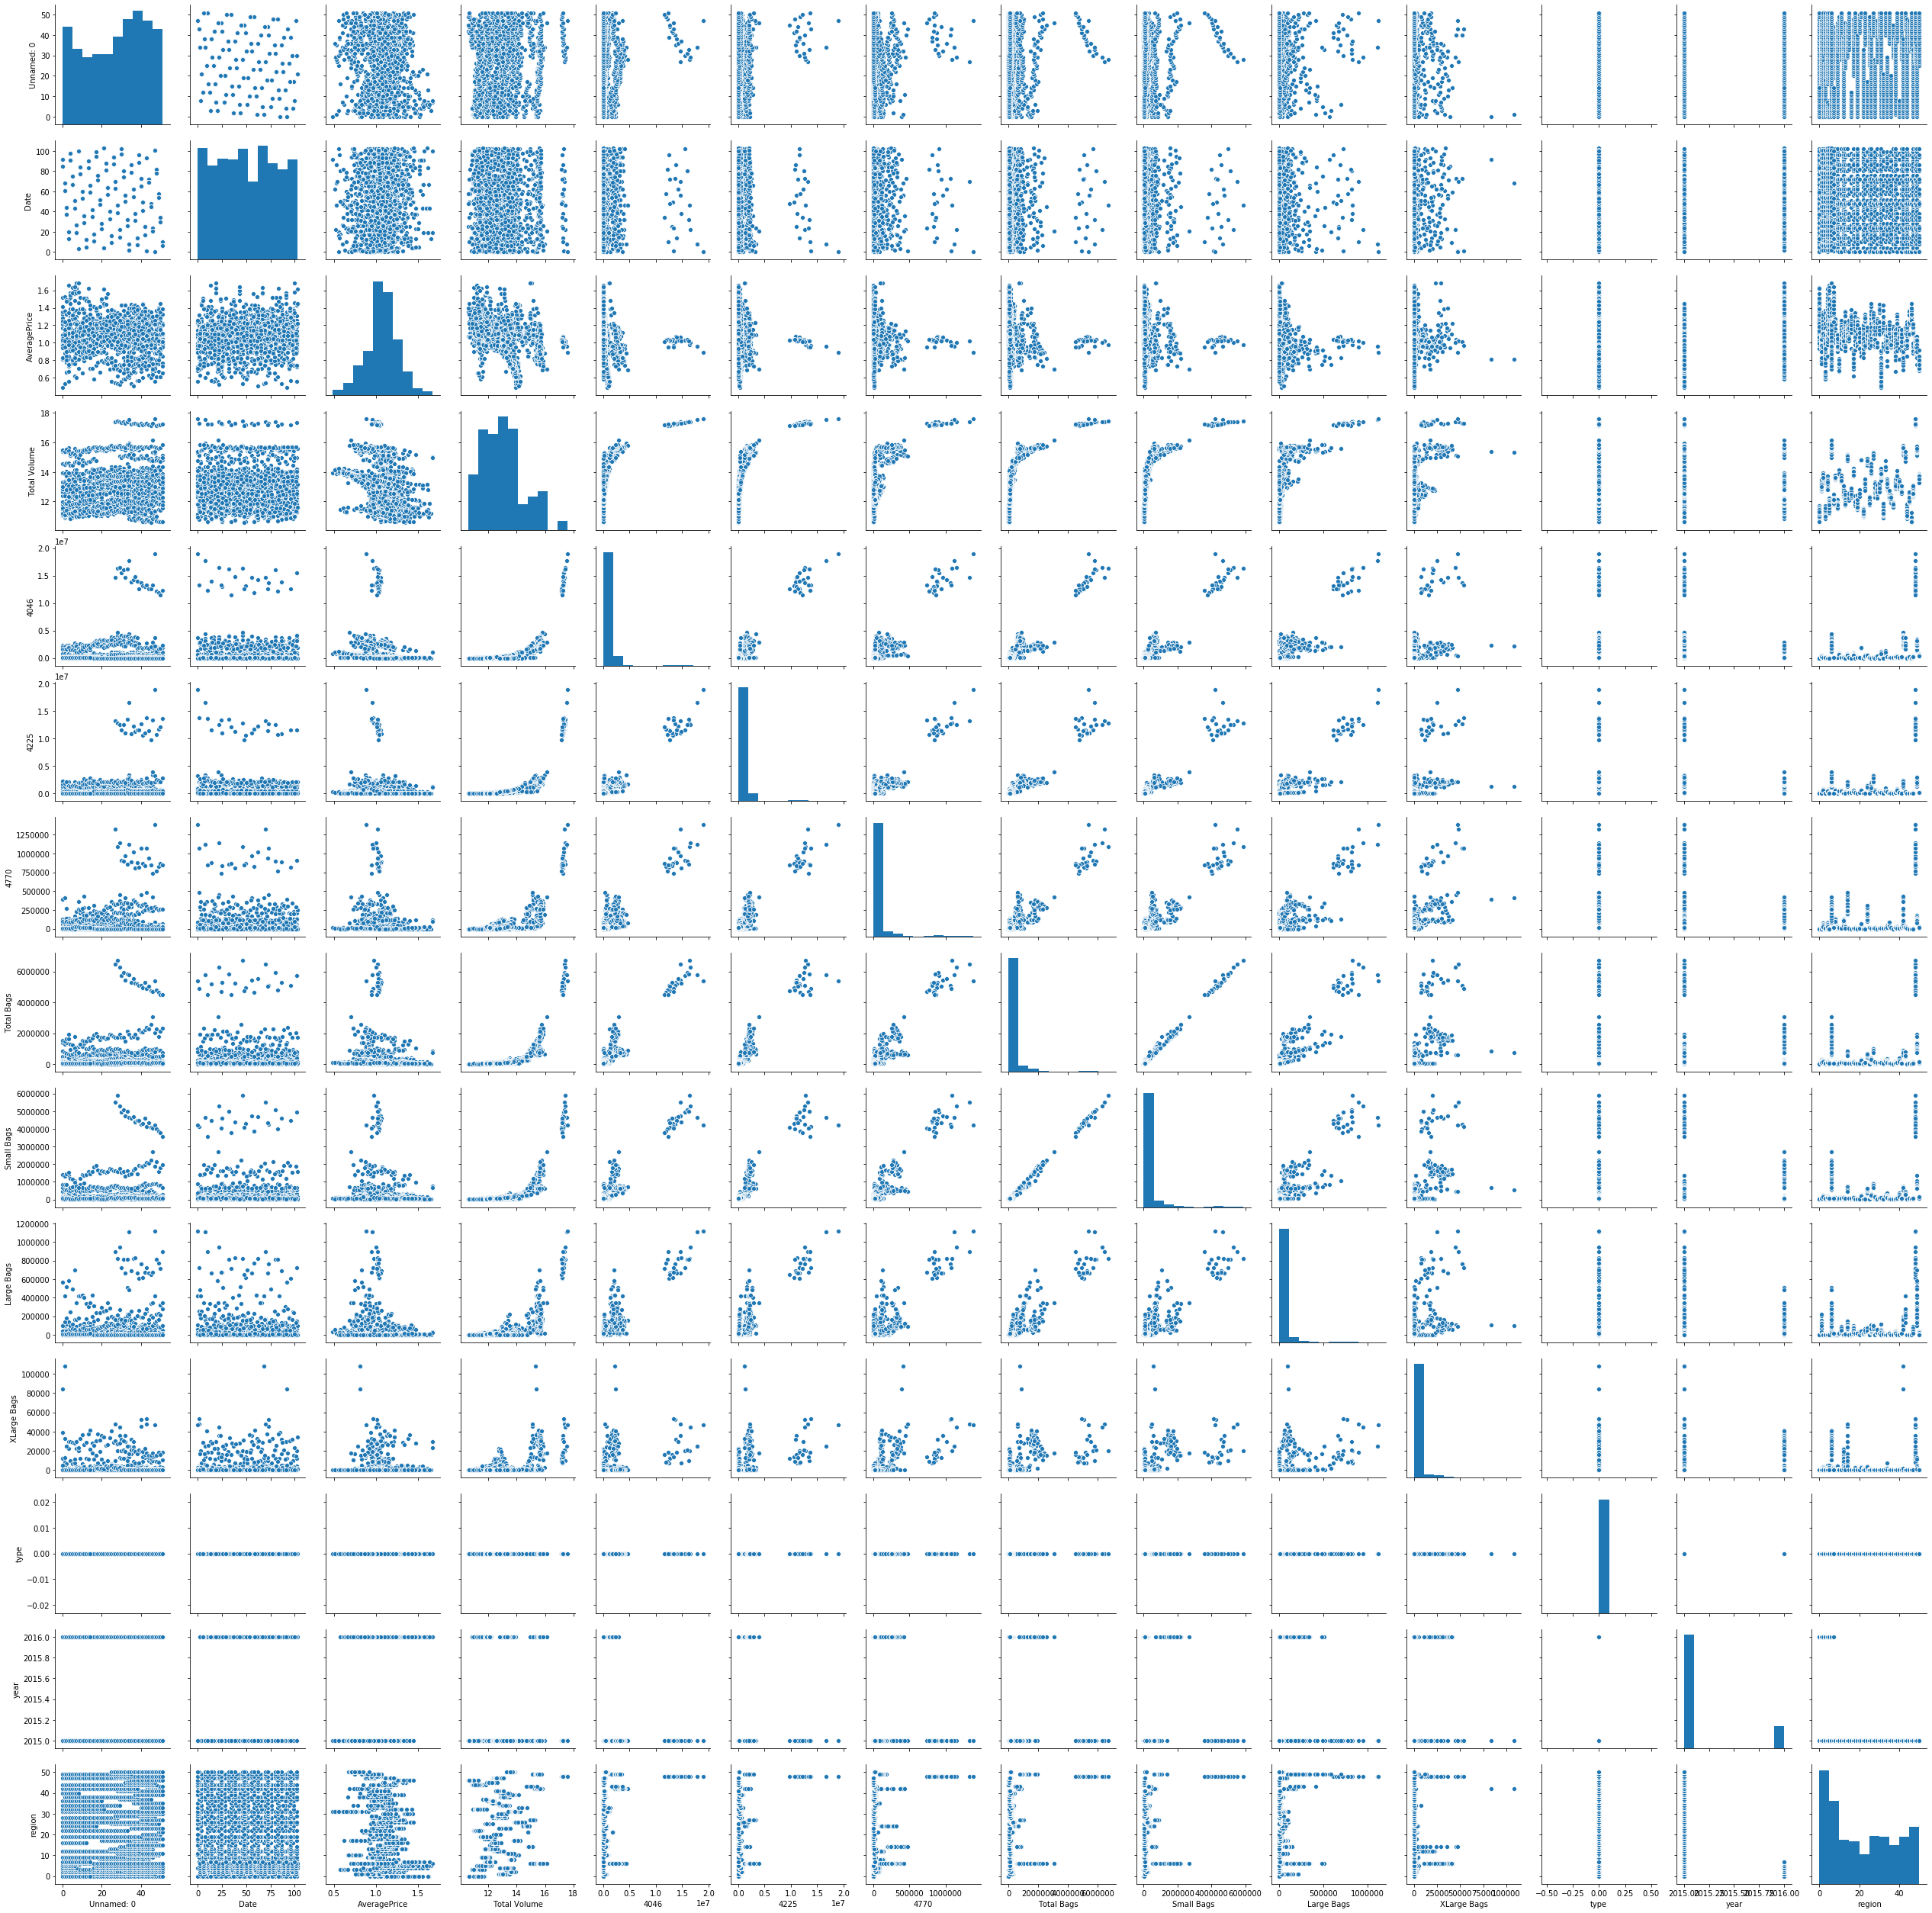

In [28]:
sns.pairplot(df)

In [29]:
#Lets describe the matrix
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,50.624918,1.074990,13.019323,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,30.040469,0.188891,1.436975,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.000000,0.490000,10.564905,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,25.000000,0.980000,11.901380,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,49.000000,1.080000,12.906175,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,75.000000,1.190000,13.797321,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,103.000000,1.680000,17.614487,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


In [30]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,92,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,1,68,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,2,44,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,3,20,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,4,98,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,1.39,12.159222,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,11,29,1.51,12.090862,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,12,5,1.48,12.091844,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,13,83,1.47,12.150198,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


In [31]:
#Let's check the correlation matrix
dfcor = df.corr()
dfcor

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.145600,-0.075531,0.102409,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
Date,-0.145600,1.000000,0.092984,-0.041561,-0.020773,-0.035118,-0.016382,-0.010990,-0.005656,-0.040195,0.011274,NaN,0.022750,-0.026002
AveragePrice,-0.075531,0.092984,1.000000,-0.326692,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.102409,-0.041561,-0.326692,1.000000,0.630909,0.640754,0.619720,0.667868,0.662332,0.626485,0.445799,NaN,0.003417,0.198022
4046,0.092013,-0.020773,-0.190096,0.630909,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.035118,-0.092084,0.640754,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.016382,-0.100567,0.619720,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.010990,-0.111597,0.667868,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.005656,-0.097682,0.662332,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.040195,-0.177480,0.626485,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452


In [32]:
df.drop('type',axis=1, inplace=True)

In [33]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,92,1.33,11.070329,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1,68,1.35,10.912849,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,2,44,0.93,11.680304,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,3,20,1.08,11.277104,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,4,98,1.28,10.840357,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,1.39,12.159222,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,11,29,1.51,12.090862,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,12,5,1.48,12.091844,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,13,83,1.47,12.150198,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


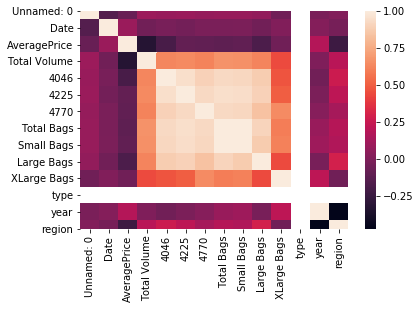

In [34]:
#Checking correlation with the help of heatmap.
sns.heatmap(dfcor)

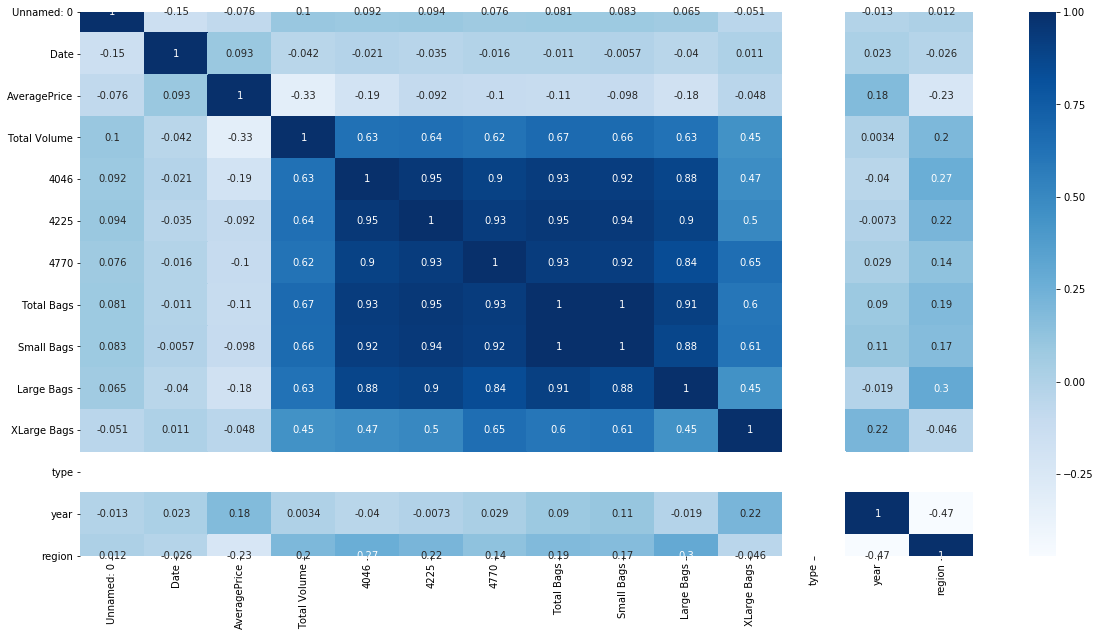

In [35]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

In [36]:
#with AveragePrice 4046 and Large Bags are highly negatively correlated so we can drop it.

In [37]:
collist=df.columns.values
ncol=15
nrows=15

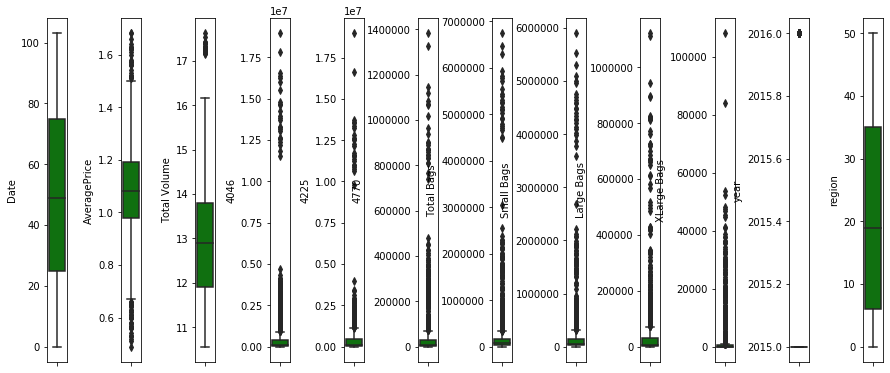

In [38]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

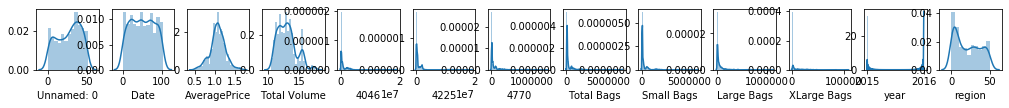

In [39]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [40]:
#lets check the skewness
df.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    0.667461
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [41]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [42]:
#lets again check the skewness
df.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    0.442493
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

In [43]:
#Now treating the outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.81868039, 1.37776563, 1.35048079, ..., 0.81077519, 0.44100815,
        1.3143384 ],
       [1.75131034, 0.57857991, 1.45639674, ..., 0.81077519, 0.44100815,
        1.3143384 ],
       [1.6839403 , 0.22060582, 0.76783831, ..., 0.81077519, 0.44100815,
        1.3143384 ],
       ...,
       [1.01023983, 1.51928262, 2.14485045, ..., 1.10389091, 2.26753179,
        0.88028586],
       [0.94286978, 1.07807099, 2.09189247, ..., 0.81077519, 2.26753179,
        0.88028586],
       [0.87549974, 0.27888526, 1.88006056, ..., 0.81077519, 2.26753179,
        0.88028586]])

In [44]:
threshold = 3
print(np.where(z>3))

(array([ 760, 1182, 1182, 1183, 1183, 1184, 1184, 1185, 1185, 1186, 1186,
       1187, 1188, 1188, 1189, 1191, 1346, 1411, 1457, 1458], dtype=int64), array([2, 7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 8, 7, 8, 7, 7, 6, 2, 2, 2],
      dtype=int64))


In [45]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers

In [46]:
z[760][2]

3.097989311954043

In [47]:
z[1182][3]

2.761987656202092

In [48]:
df_new

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,92,1.33,2.490750,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,7.608871,0
1,1,68,1.35,2.477618,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,7.608871,0
2,2,44,0.93,2.540050,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,7.608871,0
3,3,20,1.08,2.507736,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,7.608871,0
4,4,98,1.28,2.471514,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,53,1.39,2.577123,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,7.609367,7
1513,11,29,1.51,2.571914,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,7.609367,7
1514,12,5,1.48,2.571989,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,7.609367,7
1515,13,83,1.47,2.576437,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,7.609367,7


In [49]:
df_new.shape

(1503, 13)

In [50]:
df.shape

(1517, 13)

In [51]:
#4 rows has been removed

In [52]:
df_new.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

Now in this data set we will predict two things:
    1. AveragePrice - LinearRegression model
    2. region - Classification model
    

In [53]:
#AveragePrice prediction- LinearRegression model

In [54]:
df_x_lm=df[['Date','4225','4770','Total Bags','Small Bags','XLarge Bags','year','region']]

In [55]:
df_x_lm

,Date,4225,4770,Total Bags,Small Bags,XLarge Bags,year,region
0,92,10.905146,3.895080,9.070833,9.060055,0.000000,7.608871,0
1,68,10.706381,4.083115,9.159737,9.149429,0.000000,7.608871,0
2,44,11.600485,4.879007,9.005325,8.992584,0.000000,7.608871,0
3,20,11.184108,4.298373,8.667708,8.644425,0.000000,7.608871,0
4,98,10.688288,4.340944,8.729874,8.697389,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...
1512,53,10.939651,9.771828,10.992377,10.795988,5.485958,7.609367,7
1513,29,10.862658,9.874088,11.055667,10.909713,0.000000,7.609367,7
1514,5,10.876052,9.725432,11.041589,10.884322,6.716595,7.609367,7
1515,83,10.889203,9.769752,11.065587,10.926918,0.000000,7.609367,7


In [56]:
x=df_x_lm

In [57]:
x

,Date,4225,4770,Total Bags,Small Bags,XLarge Bags,year,region
0,92,10.905146,3.895080,9.070833,9.060055,0.000000,7.608871,0
1,68,10.706381,4.083115,9.159737,9.149429,0.000000,7.608871,0
2,44,11.600485,4.879007,9.005325,8.992584,0.000000,7.608871,0
3,20,11.184108,4.298373,8.667708,8.644425,0.000000,7.608871,0
4,98,10.688288,4.340944,8.729874,8.697389,0.000000,7.608871,0
...,...,...,...,...,...,...,...,...
1512,53,10.939651,9.771828,10.992377,10.795988,5.485958,7.609367,7
1513,29,10.862658,9.874088,11.055667,10.909713,0.000000,7.609367,7
1514,5,10.876052,9.725432,11.041589,10.884322,6.716595,7.609367,7
1515,83,10.889203,9.769752,11.065587,10.926918,0.000000,7.609367,7


In [58]:
y =df.iloc[:,2]

In [59]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [60]:
y.shape

(1517,)

In [61]:
y=y.values.reshape(-1,1)

In [62]:
y.shape

(1517, 1)

In [63]:
#Scaling the input variable
#Linearregression algorithm requires all features to be on common scale

In [64]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [65]:
x = scale.fit_transform(x)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [67]:
x_train.shape

(1016, 8)

In [68]:
y_train.shape

(1016, 1)

In [69]:
x_test.shape

(501, 8)

In [70]:
y_test.shape

(501, 1)

In [71]:
#Putting x and y into LinearRegression model


In [72]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.coef_


array([[ 0.00723113,  0.02366025, -0.07637918, -0.30227453,  0.28653128,
         0.02855878,  0.01126738, -0.02374439]])

In [73]:
df_x_lm.columns

Index(['Date', '4225', '4770', 'Total Bags', 'Small Bags', 'XLarge Bags',
       'year', 'region'],
      dtype='object')

In [74]:
lm.intercept_

array([1.07397296])

In [75]:
lm.score(x_train,y_train)

0.21998655790623933

In [76]:
#predict the value
pred = lm.predict(x_test)

In [77]:
print("Predictd result price:",pred)
print("Actual price:",y_test)

Predictd result price: [[1.05586795]
 [1.09785244]
 [1.10890858]
 [1.09678422]
 [1.23938393]
 [1.05107631]
 [1.08882729]
 [1.03102464]
 [0.97888097]
 [1.05936887]
 [1.10349941]
 [1.07293436]
 [1.0477152 ]
 [1.03230094]
 [0.99933701]
 [1.31522202]
 [1.12757009]
 [1.01938372]
 [1.03262232]
 [1.22717885]
 [1.05044773]
 [1.09278821]
 [1.06185691]
 [1.23046614]
 [1.15697358]
 [1.06705193]
 [1.08738341]
 [1.01475379]
 [1.08804809]
 [1.07758125]
 [1.0284405 ]
 [0.94521904]
 [1.22053932]
 [1.08955614]
 [1.03185677]
 [1.24024678]
 [1.14000255]
 [0.96167794]
 [1.01793707]
 [1.04541944]
 [1.08218332]
 [1.21588831]
 [1.2808217 ]
 [1.07211953]
 [0.89571376]
 [1.08547241]
 [1.00265612]
 [1.01014786]
 [1.10836904]
 [0.99420683]
 [1.1619308 ]
 [1.04997105]
 [1.09734662]
 [1.03150123]
 [1.0159366 ]
 [1.04498038]
 [1.07188023]
 [1.11337041]
 [1.03596642]
 [1.05598247]
 [1.09034417]
 [1.19208251]
 [1.20395965]
 [1.04405709]
 [1.0917419 ]
 [1.02003033]
 [0.98197069]
 [1.0898852 ]
 [0.97640543]
 [1.0326227

In [78]:
#Checking Error

In [79]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean squared: 0.1278564828655957
Mean Squared error: 0.02814162698414406
Root Mean Squared Error: 0.16775466307719752


In [80]:
#r2 score --> coefficient of determination
#is the proportion of the variance in the dependent variable
#is predictable from the independent variable(s)
#i.e change coming in y whenever x is being changed

In [81]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.18842534683888656


In [82]:
#predicting the price

In [83]:
t= np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,])

In [84]:
t.shape

(8,)

In [85]:
t = t.reshape(1,-1)

In [86]:
t.shape

(1, 8)

In [87]:
lm.predict(t)

array([[2.30291401]])

In [88]:
#Regularization:: L1 and L2 Regularization
   #L1--- Lasso Regression
    #L2----Ridge Regression

In [89]:
from sklearn.linear_model import Lasso, Ridge

In [90]:
#x_train,x_test,y_train,y_test
#will reduce the coefficient to zero( those features are not informative)

In [91]:
#alpha=0
ls = Lasso(alpha = 0.001)
#ls = Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.21557086121072988

In [92]:
#try to minimize the coefficient variance
rd = Ridge(alpha = 1)
#rd = Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.21968226373965247

In [93]:
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha= 0.001)
#enr = ElasticNet()
enr.fit(x_train,y_train)
enrpred = enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.21829753925985063


array([ 0.00713729,  0.02270348, -0.07337019, -0.25571001,  0.2400173 ,
        0.02593885,  0.01269005, -0.02383785])

# Tuning the model: Hyperparameter tuning: GridSearchCV

In [94]:
#Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = df
#prepare a range of alpha values to test
#alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
alphavalue ={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
#create and fit a ridge regression model, testing each alpha
model = Ridge()
#grid = GridSearchCV(estimatoe=model,param_grid=dict(alpha=alphas))

grid = GridSearchCV(estimator=model,param_grid=alphavalue)

grid.fit(x,y)
print(grid)
#summarize the resukts of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.05973182743333384
1
{'alpha': 1}


In [95]:
model = Lasso()

In [96]:
grid = GridSearchCV(estimator=model,param_grid=alphavalue)

grid.fit(x,y)
print(grid)
#summarize the resukts of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.06418322814482653
0.001
{'alpha': 0.001}


In [97]:
model = ElasticNet()
grid = GridSearchCV(estimator=model,param_grid=alphavalue)

grid.fit(x,y)
print(grid)
#summarize the resukts of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.06352277688509422
0.001
{'alpha': 0.001}


In [98]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
dataset = df
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

-0.0010020030098199903
linear
{'C': 1, 'kernel': 'linear'}


In [99]:
svr = SVR(kernel = 'linear',C =1)
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y =svr.predict(x_test)

0.21145320351460728


In [100]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

-0.1745601633927975

In [101]:
#linearRegression model has the best score, so we will save this model

In [102]:
from sklearn.externals import joblib
joblib.dump(lm,'lmavocado.obj')
lm_from_joblib = joblib.load('lmavocado.obj')
lm_from_joblib.predict(x_test) 


array([[1.05586795],
       [1.09785244],
       [1.10890858],
       [1.09678422],
       [1.23938393],
       [1.05107631],
       [1.08882729],
       [1.03102464],
       [0.97888097],
       [1.05936887],
       [1.10349941],
       [1.07293436],
       [1.0477152 ],
       [1.03230094],
       [0.99933701],
       [1.31522202],
       [1.12757009],
       [1.01938372],
       [1.03262232],
       [1.22717885],
       [1.05044773],
       [1.09278821],
       [1.06185691],
       [1.23046614],
       [1.15697358],
       [1.06705193],
       [1.08738341],
       [1.01475379],
       [1.08804809],
       [1.07758125],
       [1.0284405 ],
       [0.94521904],
       [1.22053932],
       [1.08955614],
       [1.03185677],
       [1.24024678],
       [1.14000255],
       [0.96167794],
       [1.01793707],
       [1.04541944],
       [1.08218332],
       [1.21588831],
       [1.2808217 ],
       [1.07211953],
       [0.89571376],
       [1.08547241],
       [1.00265612],
       [1.010

# region prediction- Classification model

In [103]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'],
      dtype='object')

In [129]:
x=df.iloc[:,1:11]

In [130]:
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,92,1.33,2.490750,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000
1,68,1.35,2.477618,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000
2,44,0.93,2.540050,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000
3,20,1.08,2.507736,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000
4,98,1.28,2.471514,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000
...,...,...,...,...,...,...,...,...,...,...
1512,53,1.39,2.577123,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958
1513,29,1.51,2.571914,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000
1514,5,1.48,2.571989,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595
1515,83,1.47,2.576437,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000


In [131]:
y=df.iloc[:,-1]

In [132]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [133]:
y=y.values.reshape(-1,1)

In [134]:
y.shape

(1517, 1)

In [135]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .22,random_state=45)

In [136]:
train_x.shape

(1183, 10)

In [137]:
train_y.shape

(1183, 1)

In [138]:
test_x.shape

(334, 10)

In [139]:
test_y.shape

(334, 1)

In [115]:
#doing gridsearch to find best parameter

In [116]:
#Grid Search for Algorithm Tuning

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

dataset = df
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)


0.8497033618984838
linear
{'C': 1, 'kernel': 'linear'}


In [117]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini','entropy']
}

#gridk = {'kernel' :['linear','rbf','ploy']}
gd_sr = GridSearchCV(estimator=dtc,
                    param_grid=grid_param,
                    scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)



{'criterion': 'entropy'}
0.8055372445616348


Performing various classification models to classify region.

In [118]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_x,train_y)

predmnb = mnb.predict(test_x)

print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.15868263473053892
[[11  0  0 ...  1  0  0]
 [ 3  1  0 ...  0  0  0]
 [ 2  0  2 ...  2  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  2  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.18      0.55      0.27        20
           1       0.50      0.14      0.22         7
           2       0.22      0.13      0.17        15
           3       0.47      0.50      0.48        16
           4       1.00      0.09      0.17        11
           5       0.25      0.22      0.24         9
           6       0.05      0.08      0.06        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         5
           9       0.25      0.22      0.24         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       1.00      0.09      0.17        11
          13       0.00      0.00      0.00         6
          15 

In [119]:
from sklearn.svm import SVC

svc=SVC(kernel="linear", C=1)
svc.fit(train_x,train_y)

predsvc =svc.predict(test_x)

print('actual and predicted value score',accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc ))

actual and predicted value score 0.9461077844311377
[[20  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.60      0.86      0.71         7
           2       0.94      1.00      0.97        15
           3       0.94      1.00      0.97        16
           4       0.92      1.00      0.96        11
           5       1.00      0.89      0.94         9
           6       1.00      1.00      1.00        13
           7       0.82      0.90      0.86        10
           8       1.00      1.00      1.00         5
           9       0.89      0.89      0.89         9
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        11
          13       1.00      1.00  

In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x,train_y)

predknn = knn.predict(test_x)

print(accuracy_score(predknn,test_y))
print(confusion_matrix(test_y,predknn))
print(classification_report(test_y,predknn))

0.2874251497005988
[[19  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.51      0.95      0.67        20
           1       0.11      0.57      0.18         7
           2       0.28      0.73      0.40        15
           3       0.39      0.69      0.50        16
           4       0.10      0.09      0.10        11
           5       0.50      0.33      0.40         9
           6       0.62      0.62      0.62        13
           7       0.20      0.10      0.13        10
           8       0.00      0.00      0.00         5
           9       0.30      0.78      0.44         9
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.29      0.18      0.22        11
          13       0.00      0.00      0.00         6
          14  

In [121]:
from sklearn.tree import DecisionTreeClassifier

dct=DecisionTreeClassifier(criterion='entropy')
dct.fit(train_x,train_y)
preddct=dct.predict(test_x)


print(accuracy_score(preddct,test_y))
print(confusion_matrix(test_y,preddct))
print(classification_report(test_y,preddct))


0.8592814371257484
[[18  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.78      1.00      0.88         7
           2       0.93      0.87      0.90        15
           3       0.89      1.00      0.94        16
           4       1.00      0.82      0.90        11
           5       0.89      0.89      0.89         9
           6       1.00      0.92      0.96        13
           7       0.71      1.00      0.83        10
           8       1.00      1.00      1.00         5
           9       0.80      0.89      0.84         9
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.91      0.95        11
          13       1.00      1.00      1.00         6
          15  

In [122]:
#Cross Validating to avoid overfitting and under fitting of models.

In [123]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.12654321 0.16242038 0.15181518 0.12542373 0.14590747]
0.14242199513669357
0.01443185969706596


In [124]:
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.86728395 0.92993631 0.93729373 0.92542373 0.89323843]
0.910635229739993
0.02639654803149382


In [125]:
score= cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.34567901 0.31210191 0.34653465 0.29152542 0.33096085]
0.3253603708920782
0.021038789213745617


In [126]:
score= cross_val_score(dct,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75308642 0.85031847 0.83828383 0.83389831 0.72597865]
0.8003131344490166
0.05064829613117063


In [127]:
#From above we can see that svc model has the best score, so we save this model

In [142]:
from sklearn.externals import joblib
joblib.dump(svc,'svcavocado.obj')
svc_from_joblib = joblib.load('svcavocado.obj')
svc_from_joblib.predict(test_x) 


array([42, 13, 34, 50, 19, 12, 15,  1, 31, 31,  2,  0,  7, 34,  2,  1, 26,
        4, 41,  9,  5,  9, 31,  6, 11, 12, 17, 22, 20,  1, 44, 12, 37,  3,
       43,  0,  0, 42, 46,  3, 33, 44,  6, 47,  4, 19,  0,  0,  1,  7, 12,
        8, 24, 22, 26,  0,  4, 26, 44,  0,  4, 39,  0, 47, 48,  3, 19, 26,
       31, 34, 38, 47,  2,  4,  0, 34, 38, 46, 26, 18, 47, 50, 26, 44, 34,
       44, 44, 42,  3,  0, 46, 22, 24,  3,  2,  9, 46, 44, 28, 42, 47, 16,
        6,  3, 29,  6, 37, 46, 29,  2, 17, 37, 10, 26, 12, 33, 12, 12, 26,
        9, 31, 36, 36,  7, 26, 49,  2, 35, 32,  6, 31, 33,  8, 17, 17, 30,
       34, 36,  1, 31, 36, 31,  7,  6, 37, 12,  0,  5, 21, 31, 44, 32,  7,
       44,  6, 27,  5, 12,  0,  9,  3,  2,  3,  4, 50,  9, 11,  4,  3, 40,
        0, 33, 33, 42, 49, 25,  6, 19, 42, 49, 17, 26,  7, 25, 44, 43, 37,
       11,  9,  3,  1,  0,  4,  0,  2, 34,  4, 47,  9,  3, 25, 28, 45, 17,
       19, 31, 32,  2, 28, 12, 40, 17,  6, 17,  7, 13, 50,  1, 37,  1,  2,
       44,  6, 23, 29, 31